<a href="https://colab.research.google.com/github/ryanazmi/learn-git/blob/master/Supervised_Learning_II_Decision_Tree%2C_Ensamble_Learning_dan_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chapter 4:
 Supervised Learning II: Decision Tree, Ensamble Learning dan
 Random Forests


 1 Decision Tree
 Decision Tree (DT) merupakanalgoritmaMachineLearning(ML)yangdapatdigunakanuntukklasi
f
 ikasi maupunregresi,danbahkanbisadigunakanpadamasalah-masalahdenganmultioutput. DT
 merupakan algoritma yang cukup powerful mampu melakukan fitting untuk dataset yang cukup
 kompleks. DT juga merupakan bagian fundamental dari Random Forrest, yang merupakan salah
 satu algoritma ML tersedia dan cukup powerful.
 Sebagai ilustrasi dari DT, contoh pada Gambar 4.1 adalah penggunaan DT untuk melakukan kon
struksi klasifikasi jenis binatang yang mungkin anda temui ketika sedang berjalan-jalan ke hutan.
 Pemisahan secara biner membuat algoritma DT sangat efisien. Pada DT yang dikonstruksi den
gan baik, setiap pertanyaan akan mengurangi pilihan kurang lebih setengahnya, sehingga akan
 sangat cepat mengurangi kemungkinan-kemungkinan pilihan meskipun jumlah class yang sangat
 besar. Trick-nya tentunya adalah untuk memberikan pertanyaan yang paling tepat pada setiap
 langkah. Pada implementasi machine learning dari DT, pertanyaan-pertanyaan tersebut pada se
tiap node membagi data ke dalam dua grup menggunakan sebuah harga cutoff pada salah satu
 features yang ada

![1.PNG](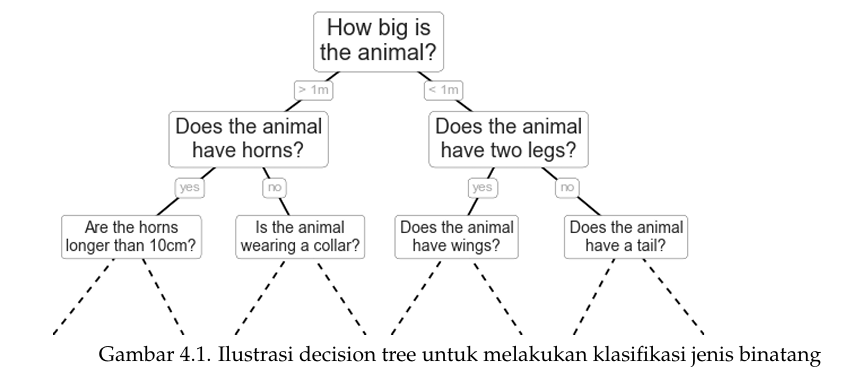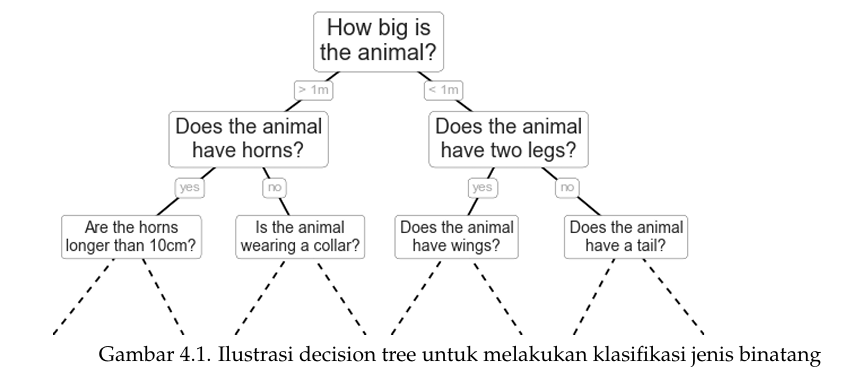)

Untuk memvisualisasikan DT, kita akan membuat sebuat contoh DT dan melihatnya bagaimana
 melakukan prediksi. Kode Python berikut melakukan training dari DecionTreeClassifier pada
 dataset iris

In [6]:
# Load Data Set Iris
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:] # Petal length and petal width
y = iris.target


In [7]:
# Training classifier
tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42,criterion='gini')
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

 • Untuk memvisualisasikan DT yang sudah ditraining, kita bisa memakai metode
 export_graphviz() sehingga dihasilkan file .dot dan file image.

In [9]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_clf,out_file=None,feature_names=iris.feature_names[2:],class_names=iris.target_names,rounded=True,filled=True)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_4.jpg')

True

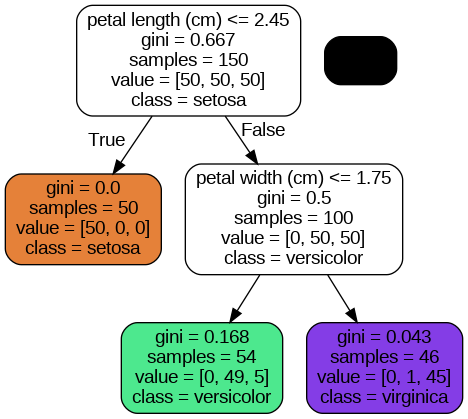

Maka hasil training algoritma DT dapat dilihat pada file tree_4.jpg yang telah tersimpan, yang
 diperlihatkan juga pada Gambar 4.2.
 Jika dimisalkan kita menemukan sebuah bunga iris dan ingin mengklasifikasikannya, apakahdari
 jenis sentosa, versicolor atau virginica, maka proses klasifikasi yang ditunjukkan pada Gambar
 4.2 adalah sebagai berikut. 1. Dimulai pada root node (depth = 0,paling atas), dengan pertanyaan
 apakah petal length 2.45? Jika ya, maka kita turun ke node anak root node sebelah kiri (depth = 1,
 kiri), yang merupakan leaf node karena tidak mempunyai lagi node anak. Jika tidak maka turun
 ke node anak sebelah kanan (depth = 1, kanan), yang bukan leaf node karena masih mempunyai  node anak. 2. Pada node anak sebelah kanan, pertanyaan selanjutnya apakah petal width 1.75?
 Jika ya, maka bunga tersebut kemungkinan besar adalah Iris versicolor (depth = 2, kiri), dan jika
 tidak maka kemungkinan besar bunga tersebut adalah Iris virginica (depth = 2, kanan).
 Pada Gambar 4.2, atribut samples menghitung jumlah sampel training yang termasuk kategori
 tersebut. Misalkan, 100 sampel training mempunyaipetal length > 2.46cm(depth = 1, kanan), dan
 diantara 100 sampel tersebut, 54 sampel training mempunyai petal width 1.75 cm (depth = 2,
 kiri). Atribut value menyatakan berapa training sampel dari tiap class yang berada pada node
 tersebut. Misalkan untuk node di kanan bawah terdapat 0 Iris sentosa, 1 Iris versicolor dan 45 Iris
 virginica. Dan yang terakhir, atribut gini menyatakan ukuran impurity. Node dikatakan pure jika
 gini = 0 yang berarti semua sampel training yang lewat node tersebut berasal dari satu class yang
 sama. Sebagai contoh, node (depth = 1, kiri) hanya dilalui oleh sampel training class Iris sentosa,
 maka dikategorikan sebagai pure dan gini = 0. Perhitungan skor gini menggunakan persamaan
 (4.1). Sehingga untuk node (depth = 2, kiri), skore gini sama dengan 1 (0/54)2 (49/54)2
(5/54)2
0.168

Program Python berikut menghasilkan gambar yang menunjukan batas keputusan dari DT (DT
 decision boundaries). Garis tebal merepresentasikan batas keputusan dari node root (depth = 0)
 3
denganpetallength =2.45cm. Karenaareasebelahkirimempunyaiimpurity=0(hanyaIrissentosa),
 maka tidak bisa dibagi lebih jauh ke dalam cabang lain. Tetapi area sebelah kanan bersifat impure
 sehingga node depth = 1 sebelah kanan dibagi lagi dengan batas petal width = 1.75 cm, yang
 direpresentasikan dengan garis putus-putus. Karena max_depth dibatasi 2, maka DT selanjutnya
 akan berhenti. Jika max_depth dibatasi dengan 3, maka percabangan akan dilanjutkan sekali lagi
 dimana node depth = 2 akan terbagi masing-masing menjadi dua daerah (garis-garis putus titik
titik)

 1.1 Estimasi probabilitas dari class
 DT bisa digunakan untuk melakukan estimasi probabilitas sebuah data termasuk pada class k
 tertentu. Pertama, algoritma akan memeriksa data tersebut melalui cabang-cabang untuk menen
tukanleaf node data tersebut. Setelah ditemukanmakaakandihitungrasiosampel-sampeltraining
 yang termasuk pada class k tersebut pada node ini, dan mengembalikannya sebagai probabilitas
 class k untuk data tersebut. Sebagai contoh, jika terdapat bunga dengan panjang petal 5 cm dan
 lebar 1.5 cm, maka leaf node untuk data tersebut adalah depth = 2 sebelah kiri, sehingga DT akan
 menghasilkan probabilitas berikut: 0% 0/54 untuk Iris setosa, 90.7% 49/54 untuk Iris virginica, dan
 9.3% (5/54) untuk Iris versicolor.

In [10]:
tree_clf.predict_proba([[5,1.5]]) #Data baru Petal Length = 5 , Petal Width = 1.5

array([[0.        , 0.90740741, 0.09259259]])

In [37]:
pl = input("input Petal Length : ")
pw = input("input Petal Width : ")
result = tree_clf.predict([[pl,pw]])
results = int(result)

if results == 0:
  print("Jenis : Setosa")
elif results == 1:
  print("Jenis : Versicolor")
else :
  print("Jenis : Virginica")

input Petal Length : 2.47
input Petal Width : 1.77
Jenis : Virginica


<ipython-input-37-54cb64930f32>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results = int(result)


1.2 Algoritma Training Classification and Regression Training (CART)
 Scikit-Learn menggunakan algoritma CART untuk training DT. Algoritma bekerja dengan
 melakukan pemisahan (splitting) training set menjadi 2 subset menggunakan satu feature k dan
 sebuah threshold tk (mis. petal length
2.45 cm). Pertanyaannya kemudian adalah, bagaimana
 memilih feature k dan juga threshold (tk)? Maka DT akan mencari pasangan (k,tk) yang meng
hasilkan subset yang paling kecil impurity-nya (diboboti dengan ukurannya).

Persamaan (4.2) memberikan cost-function yand diminimalkan pada saat mencari pasangan (k,tk).
 Persamaan (4.2) Cost function dari CART untuk klasifikasi

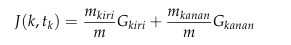

 dimana, Gkiri/kanan merupakan ukuran impurity dari subset kiri/kanan dan mkiri/kanan adalah jum
lah data pada subset kiri/kanan.


 Setelah algoritma CART berhasil memisahkan training set menjadi dua subset, maka kemudian
 CART akan melakukan pemisahan subset tersebut menggunakan cara yang sama. Demikian
 seterusnya dilakukansecararekursif, danakanberhentisetelahmencapaimaximumdepth(didefin
isikan dengan hyperparameter max_depth), atau sampai tidak ditemukan lagi pemisahan yang akan
 mengurangi impurity

 1.3 Impurity dengan Gini atau Entropy
 Untuk perhitungan impurity secara default digunakan Gini Impurity pada Persamaan (4.1), tetapi
 kita juga bisa menggunakan entropy impurity dengan memilih hyperparameter criterion ke
 entropy. Konsep entropy berasal dari termodinamika sebagai ukuran ketiakberaturan molekuler.
 Ketika entropy mendekati nilai nol maka molekul-molekul berada pada keteraturan. Entropy juga
 menyebar ke domain yang lain, seperti pada Teori Informasi dari Shannon, dimana istilah entropy
 digunakan untuk ukuran rata-rata informasi sebuah pesan. Entropy bernilai nol jika semua pesan
 identik.
 Pada Machine Learning, ukuran entropy sering digunakan sebagai ukuran impurity. Jika se
buah node hanya berisi data-data dari satu kelas saja maka entropy dikatakan nol. Seperti
 pada Gambar 4.2, pada node dengan depth = 2 sebelah kiri mempunyai entropy sama dengan
 n
 (49/54)log2(49/54) (5/54)log2(5/54) = 0.445

 Pertanyaannya mana yang lebih baik kita gunakan, ukuran impurity dengan Gini atau Entropy?
 Pengalaman menunjukan keduanya akan menghasilkan kinerja yang tidak jauh berbeda. Kedu
anya biasanya akan menghasilkan trees yang sama. Gini impurity cenderung lebih cepat diband
ingkan dengan entropy impurity. Tetapi, ketika keduanya berbeda maka Gini mempunyai kecen
derungan untuk mengisolasi class yang paling banyak muncul pada satu cabang tersendiri dari
 sebuah tree, sedangkan Entropy lebih cenderung menghasilkan trees yang lebih seimbang.